<a href="https://colab.research.google.com/github/jansoe/Lehre/blob/main/ImageManipulator_Class_with_NumPy_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Image Manipulation Functions in Python with NumPy

You are provided with a backbone of an `ImageManipulator class`. Your task is to complete the class by implementing various methods for manipulating images. Each method should perform a specific operation on an image and return the result.

* Flip the Image:
    - Complete the `flip_image(self, direction)` method that takes a direction ('horizontal' or 'vertical') as input and returns the image flipped in the specified direction. For a horizontal flip, reverse the order of columns. For a vertical flip, reverse the order of rows.

* Crop the Image:
    - Complete the `crop_image(self, start_row, start_col, end_row, end_col)` method that takes coordinates for the top-left and bottom-right of the desired crop area, and returns the cropped image.

* Split Color Channels:
    - Complete the `split_color_channels(self)` method that returns a tuple of three 2D arrays, each representing a color channel (Red, Green, Blue).

* Convole with Filter (**difficult**)
    - Complete the `convole(self, channel, filter)` method that first selects the corresponding color-`channel` from the image and than  takes the `filter` (a n X n- 2D numpy array) to apply the convolution operation on this channel. Implement the convolution yourself and do not use the scipy function

In [42]:
import numpy as np

class ImageManipulator:

    def __init__(self, image):
        self.image = image

    def flip_image(self, direction):
        transformed_image = self.image.copy()
        if direction == 'horizontal':
            transformed_image = transformed_image[:, ::-1, :]
        elif direction == 'vertical':
            transformed_image = transformed_image[::-1, :, :]
        return transformed_image

    def crop_image(self, start_row, start_col, end_row, end_col):
        transformed_image = self.image.copy()
        return transformed_image[start_row:end_row, start_col:end_col]

    def split_color_channels(self):
        transformed_image = self.image.copy()
        # ToDo: Add Code here to transform image
        return transformed_image[:,:,0], transformed_image[:,:,1], transformed_image[:,:,2]

    def convolve(self, filter, channel):
        image = self.image[:,:,channel]
        f_rows, f_cols = filter.shape
        im_rows, im_cols = image.shape
        # calculate how often fits the filter in the image
        new_rows = im_rows - f_rows
        new_cols = im_cols - f_cols
        transformed_image = np.zeros((new_rows, new_cols), dtype='int')
        for row in range(0, new_rows):
            for col in range(0, new_cols):
                transformed_image[row, col] = np.sum(filter * image[row:row+f_rows, col:col+f_cols])
        return transformed_image

In [43]:
my_im.image.shape

(427, 640, 3)

### Test

First take some image and create an ImageManipulator object

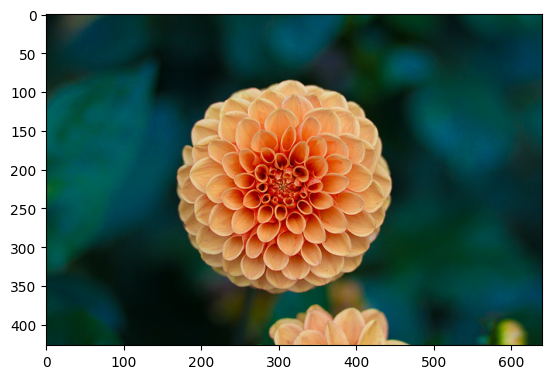

In [44]:
import sklearn.datasets
import matplotlib.pyplot as plt

img = sklearn.datasets.load_sample_image('flower.jpg')
_ = plt.imshow(img)

my_im = ImageManipulator(img)

Than apply a transformation and look at the output (Note: You need to first implement your solution to see an effect)

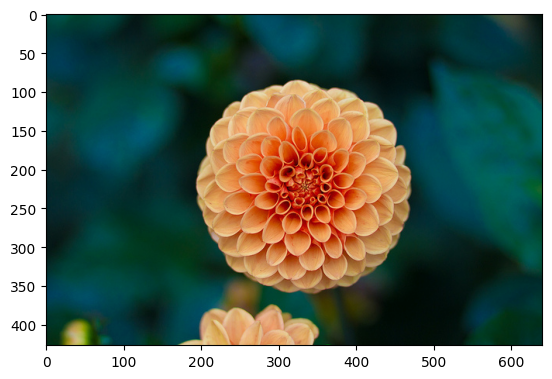

In [45]:
flipped_h = my_im.flip_image('horizontal')
_ = plt.imshow(flipped_h)

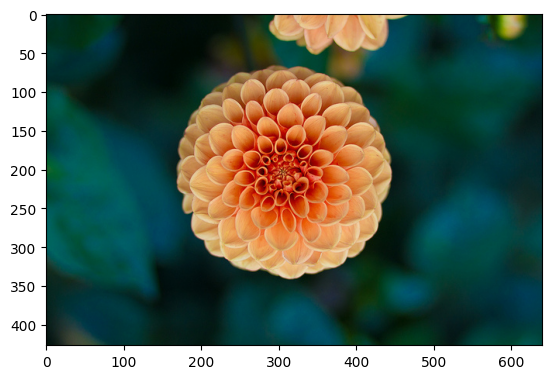

In [46]:
flipped_h = my_im.flip_image('vertical')
_ = plt.imshow(flipped_h)

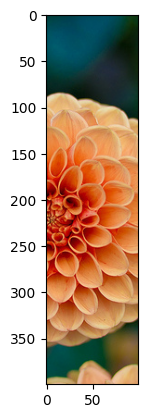

In [47]:
im = my_im.crop_image(0,300,400,400)
_ = plt.imshow(im)

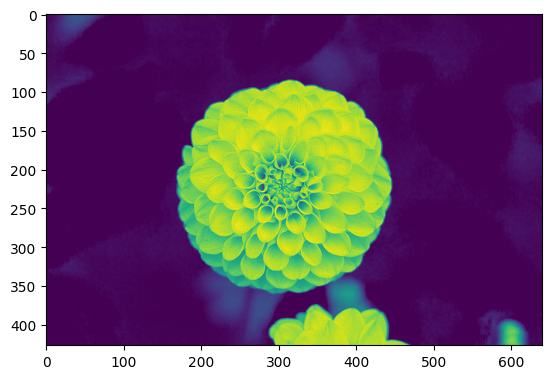

In [48]:
r,g,b = my_im.split_color_channels()
_ = plt.imshow(r)

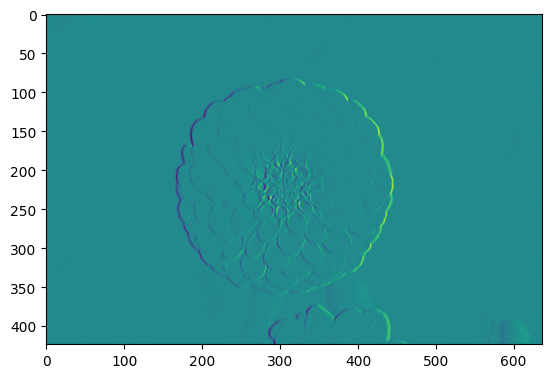

In [49]:
# sobel filter
filt = np.array([[1.,0.,-1.],
                 [2.,0.,-2.],
                 [1.,0.,-1.]])
filt /= np.abs(filt).sum()

im = my_im.convolve(filt, 0)
_ = plt.imshow(im)